<h1 style="color: blue;">가. Data labeling</h1>

데이터 라벨링 작업은 머신러닝이나 딥러닝 모델링 작업 전에 학습 데이터에 특정 값을 부여 해주는 것입니다. 이는, AI 산업의 기본이기도 하지만, 기업의 AI 사업의 획기적 발전을 이루기 위한 핵심 요소로 인식됩니다.

<h2 style="color: green;">1. 컴퓨터 비전에서의 라벨링 기법</h2>

### *Bounding Box*
물체를 직사각형 모양의 박스 안에 포함되도록 그리는 라벨링 방법

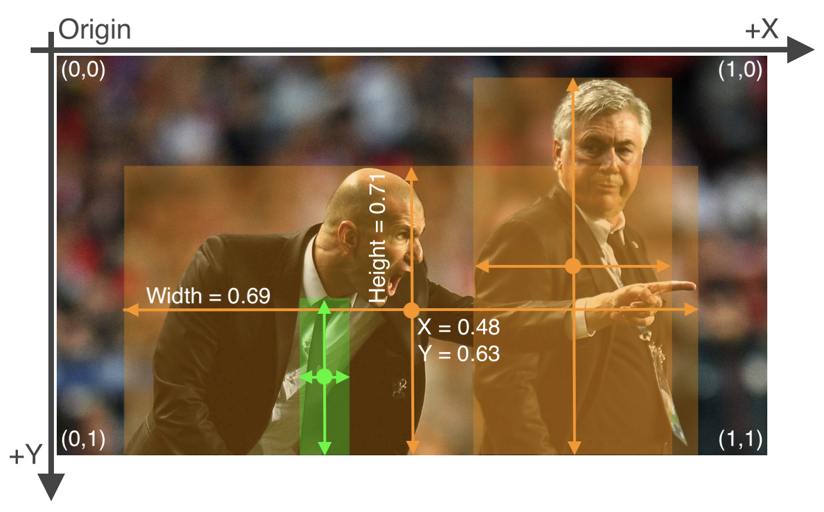

bbox는 bbox를 구성하는 대각선 관계의 두 점 (x1,y1 ), (x2, y2 )를 한 리스트에 넣거나, bbox를 구성하는 한 점 (x,y)와 bbox의 가로, 세로 길이를 나타내는 w, h를 한 리스트에 넣는 방식이 자주 사용됩니다.

[좌측상단 x좌표, 좌측상단 y좌표, 우측하단 x좌표, 우측하단 y좌표]로 표시하였지만 yolo에서는 [x_center, y_center, w, h] 이렇게 입력한다.

### *Polygon*
다각형 모양으로 객체의 가시 영역 외곽선을 따라 점을 찍어 그리는 라벨링 방법

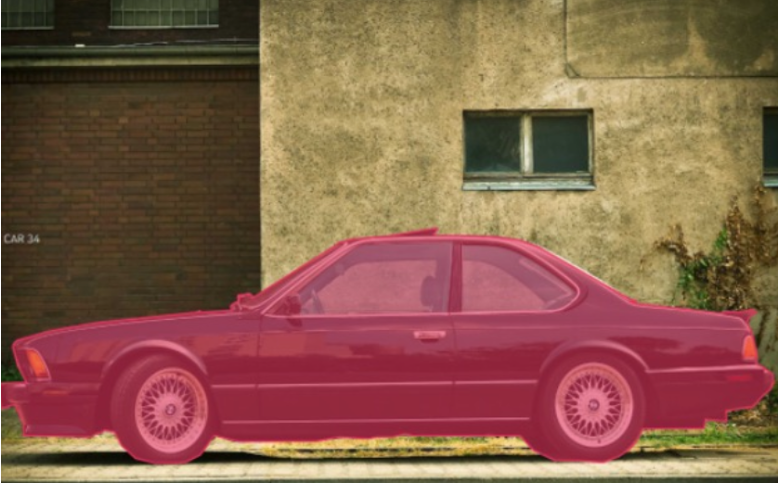

폴리곤(polygon)에 대한 정보는 모델 학습 시 필요하므로 반드시 작성되어야 합니다. 

bbox와 폴리곤은 이미지 내에서 인식 대상(객체)의 위치를 표시하기 위해 사용하며, bbox는 사각형, 폴리건은 그 이상의 다각형을 이용합니다. 

폴리건은 일반적으로 폴리건을 구성하는 (x,y) 좌표 쌍들을 순서대로 리스트로 만들어 표현합니다.


### *Polyline*
여러 개의 점을 가진 선을 활용하여 특정 영역을 라벨링함으로써 인도, 차선 등을 구분

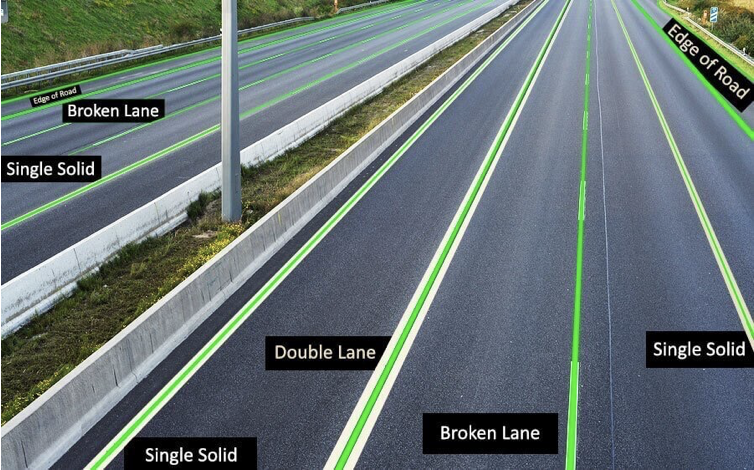

컴퓨터 비전 분야에서는 이미지나 비디오에서 물체의 경계선을 추출할 때 Polyline 기술을 활용하기도 합니다. Polyline 라벨링은 물체의 윤곽선을 더 정확하게 표현할 수 있기 때문에, 객체 검출과 같은 작업에서 많이 활용됩니다.

### *Point*
특정 지점을 라벨링하는 작업으로 안면 인식을 통한 감정 분헉과 같이 정밀하고 섬세한 작업

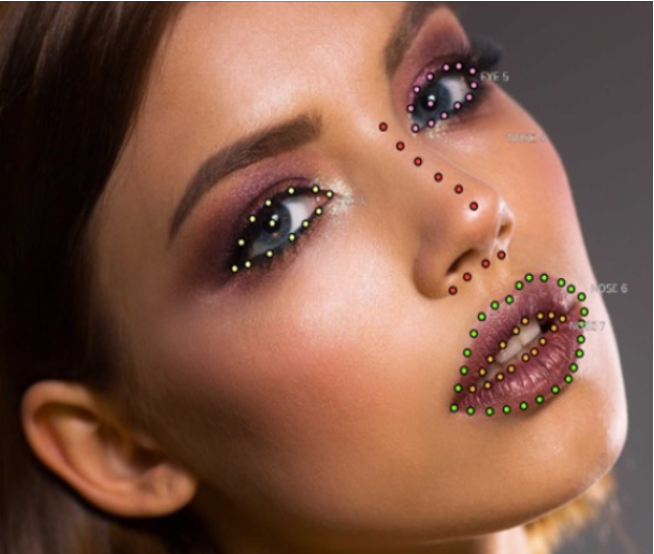

Keypoint는 대개 이미지나 비디오에서 특정한 위치에 있는 픽셀의 좌표(x, y)를 나타내며, 해당 위치에서 추출된 feature vector와 함께 사용됩니다. 

이러한 feature vector는 해당 Keypoint가 나타내는 이미지나 비디오의 특징을 설명하며, 대부분의 경우 Keypoint의 특징 벡터는 해당 Keypoint의 주변 영역에서 추출됩니다.

<h2 style="color: green;">2. Annotation</h2>

데이터 라벨링에서 주석(annotation)은 데이터에 대한 추가적인 정보나 레이블을 제공하는 것을 의미합니다. 데이터 라벨링은 주로 기계 학습과 컴퓨터 비전 분야에서 사용되며, 데이터셋의 각 샘플에 대한 의미 있는 정보를 부여하기 위해 사용됩니다.

### *JSON*
JSON(JavaScript Object Notation)은 경량의 데이터 교환 형식입니다. JSON은 사람이 읽고 쓰기에 용이하고, 기계가 분석하고 생성하기도 쉬워 많이 사용됩니다. 

JSON은 키-값 쌍으로 이루어진 데이터 오브젝트를 저장합니다. 키(key)는 문자열이며, 값(value)은 문자열, 숫자, 불리언, 배열, 객체 등이 될 수 있습니다. 이러한 데이터 오브젝트들은 중첩될 수 있어 복잡한 데이터도 표현할 수 있습니다.

In [4]:
import json
import os
import cv2
import matplotlib.pyplot as plt

In [14]:
#json 파일을 가져온다.
json_data_path = "../data/instances_default.json"

with open(json_data_path, 'r', encoding='utf-8') as j :
    json_data = json.load(j)
    
print("json_data type : ", type(json_data))
print(json_data)

json_data type :  <class 'dict'>
{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [15]:
#json 값을 가져와서 체크
print(json_data['categories'])
#결과 -> [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]

print(json_data['images'])
#결과 -> [{'id': 1, 'width': 640, 'height': 480, 
#'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]

print(json_data['annotations'])
#결과 -> 
#[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, 
# {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


In [16]:
#변수 선언
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

# print(categories_info)
# print(images_info)
# print(annotations_info)

#라벨 딕셔너리 선언
label_dict = {1 : 'cat', 2 : 'dog'}

2 bbox 좌표 확인 >>  468 92 171 248
2
dog
1 bbox 좌표 확인 >>  3 183 200 214
1
cat


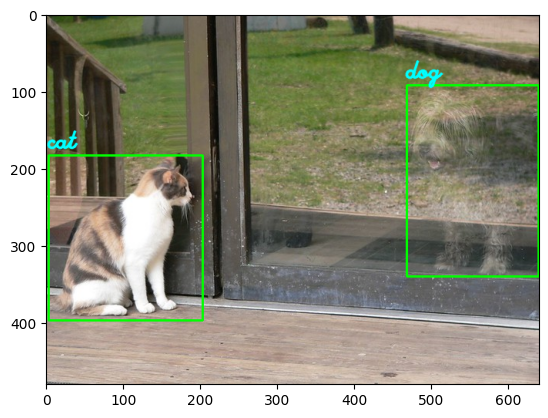

In [20]:
for image_json in images_info :
    #해당 카테고리 리스트 내 요소를 읽어오려면 for문으로 순회해준다.
    #print(image_json)
    file_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    image_id = image_json['id']
    image_path = ("../data/" + file_name)
    
    #image read
    image = cv2.imread(image_path)
    #print(image)

    #색상의 문제 발생 BGR -> RGB 컨버터 필요
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for anno_json in annotations_info :
        #해당 이미지 내에서 라벨링 주석 정보 읽어오기
        #print(anno_json)
        
        if image_id == anno_json['image_id'] :
            category_id = anno_json['category_id']
            bbox = anno_json['bbox']
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            print("{} bbox 좌표 확인 >> ".format(category_id), x,y,w,h)
            
            #bbox 그리기
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
            #이미지 선택, 왼쪽 위 모서리 좌표, 가로 길이/세로 길이, 선 색상, 선 두께
            
            #라벨 표시
            print(category_id)
            
            label_name = label_dict[category_id]
            #작성한 딕셔너리에서 key값을 받고 value값을 반환해서 label_name에 저장
            print(label_name)
            image = cv2.putText(image, label_name, (x,y-10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1,
                               (0, 255, 255), 2, cv2.LINE_AA)
            #여기서 1은 텍스트의 크기, 2는 텍스트의 두께
            #cv2.LINE_AA: 텍스트의 안티앨리어싱 방법을 지정합니다. LINE_AA는 안티앨리어싱을 적용하여 부드럽게 텍스트를 표시합니다.


plt.imshow(image)
plt.show()